In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

### Limpieza

In [278]:
# Cargar el archivo CSV
file_path = "data_2/country_find_final.csv"
df = pd.read_csv(file_path)

# Renombrar columnas 
df_columns = df.rename(columns={
    "Country Name": "pais",
    "Region": "region",
    "Continent": "continente",
    "Desempleo hombres": "desempleo_hombres",
    "Pago de impuestos (numero)": "pago_impuestos",
    "Desempleo mujeres": "desempleo_mujeres",
    "Desempleo, total": "desempleo_total",
    "Empleos agricultura": "empleos_agricultura",
    "Indice facilidad para hacer negocios": "indice_facilidad_para_hacer_negocios",
    "Crecimiento PIB per capita": "crecimiento_PIB_per_capita",
    "Contaminación aire": "contaminacion_aire",
    "Agricultura, silvicultura y pesca, valor agregado": "agricultura_silvicultura_pesca_valor_agregado",
    "Exportaciones bienes y servicios (% del PIB)": "exportaciones_bienes_servicios_PIB",
    "Nuevas empresas registradas (numero)": "nuevas_empresas_registradas",
    "Empleadores, total": "empleadores_total",
    "Inflación, deflactor del PIB (%) anual": "inflacion_deflactor_PIB",
    "Personas desempleadas educación basica": "personas_desempleadas_educacion_basica",
    "Tierras cultivables": "tierras_cultivables",
    "Trabajadores asalariados (empleados), total": "trabajadores_asalariados",
    "Médicos (cada 1.000 personas)": "medicos_por_1000_personas",
    "Inversión extranjera directa": "inversion_extranjera_directa",
    "Crecimiento población urbana": "crecimiento_poblacion_urbana",
    "Empleo vulnerable, total": "empleo_vulnerable_total",
    "Personas desempleadas educación avanzada": "personas_desempleadas_educacion_avanzada",
    "PIB per capita US a precios actuales": "PIB_per_capita",
    "Comercio servicios": "comercio_servicios",
    "Empleados agricultura - hombres": "empleados_agricultura_hombres",
    "Exportaciones de bienes y servicios(% anual)": "exportaciones_bienes_servicios",
    "Personas desempleadas educación intermedia": "personas_desempleadas_educacion_intermedia",
    "Empleados agricultura - mujeres": "empleados_agricultura_mujeres",
    "Score": "puntaje",
    "Perceptions of corruption": "corrupcion",
    "Health": "salud",
    "Freedom": "libertad",
    "Agricultura, silvicultura y pesca": "agricultura_silvicultura_pesca",
    "Industria (incluye Manufactura)": "industria",
    "Construcción": "construccion",
    "Comercio al por mayor y al por menor, transporte, alojamiento y servicios de comida": "comercio_por_mayor_menor_transporte_alojamiento_comida",
    "Información y comunicación": "informacion_comunicacion",
    "Actividades financieras y de seguros": "actividades_financieras_seguros",
    "Actividades inmobiliarias": "actividades_inmobiliarias",
    "Actividades profesionales, científicas y técnicas; actividades administrativas y de apoyo": "actividades_profesionales_cientificas_tecnicas_administrativas_apoyo",
    "Administración pública, defensa, educación, actividades de salud humana y de trabajo social": "administracion_publica_defensa_educacion_salud_trabajo_social",
    "Artes, entretenimiento y recreación; otras actividades de servicios; actividades de organizaciones y cuerpos extraterritoriales": "artes_entretenimiento_recreacion_servicios_organizaciones_extraterritoriales"
})

# Lista de columnas a eliminar
columns_to_remove = [
    "region", "desempleo_hombres", "desempleo_mujeres", "empleados_agricultura_hombres", 
    "empleados_agricultura_mujeres", "empleo_vulnerable_total", 
    "personas_desempleadas_educacion_avanzada", "personas_desempleadas_educacion_intermedia",
    "informacion_comunicacion", "agricultura_silvicultura_pesca"
]
columns_to_remove = [col for col in columns_to_remove if col in df_columns.columns]  # Filtrar columnas existentes
df_cleaned = df_columns.drop(columns=columns_to_remove)

# Normalizar los datos excepto 'pais' y 'continente'
scaler = StandardScaler()
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

df_cleaned.to_csv('data_2/country_find_cleaned.csv', index=False)

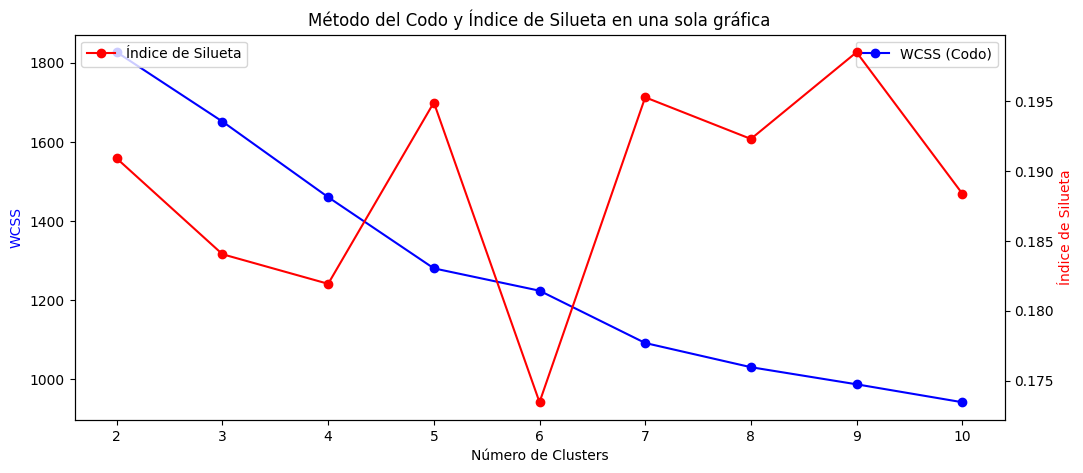


Comparación de Índice de Silueta para diferentes números de clusters:
   Número de Clusters  Índice de Silueta     Comentario
0                   3           0.184057  Menor calidad
1                   4           0.181937  Menor calidad
2                   5           0.194927   Mejor opción
3                   6           0.173455  Menor calidad

Índice de Silueta para K-Means con 5 clusters: 0.19492732557262576


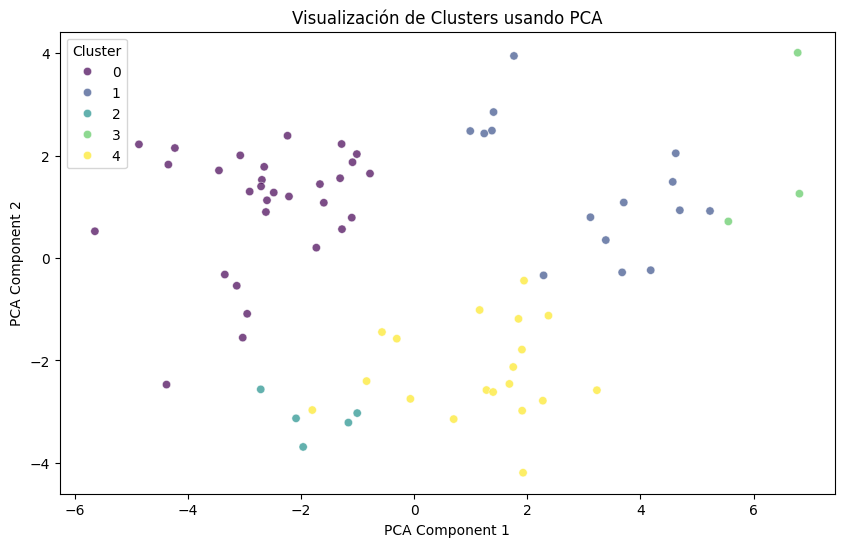

/var/folders/bd/c6514xtd1zjgq83rf48wyhn00000gn/T/ipykernel_53198/1799098954.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_df["Variable"], x=importance_df["Importancia"], palette="viridis")


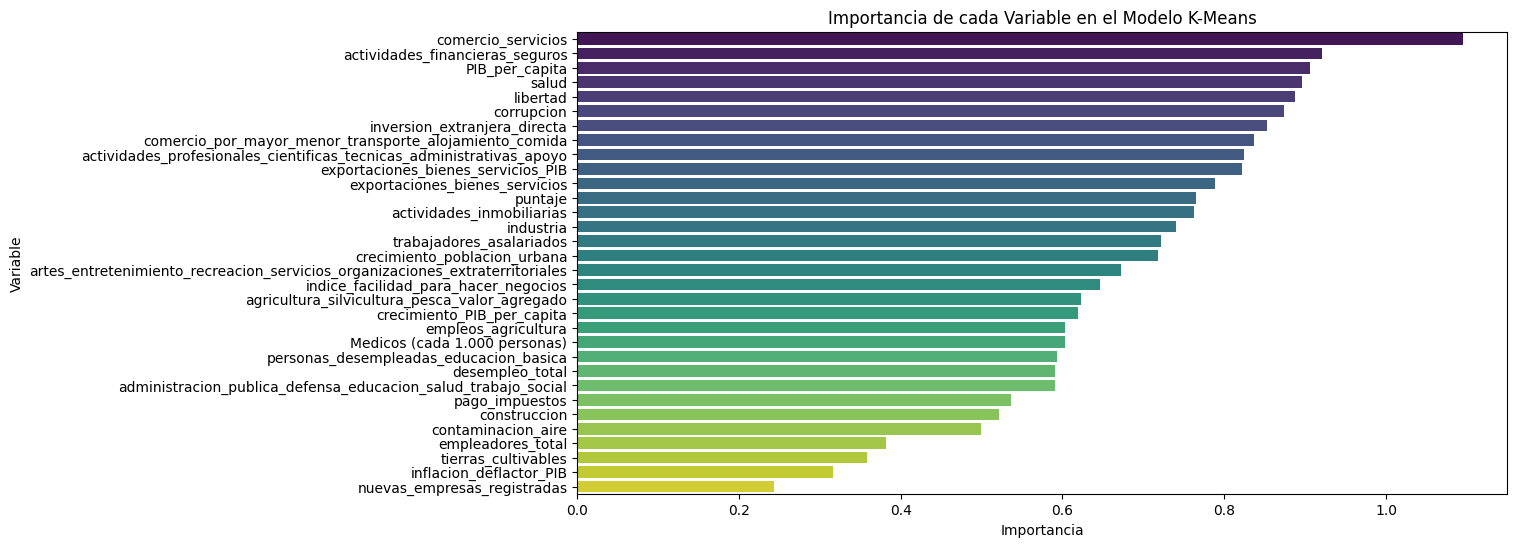

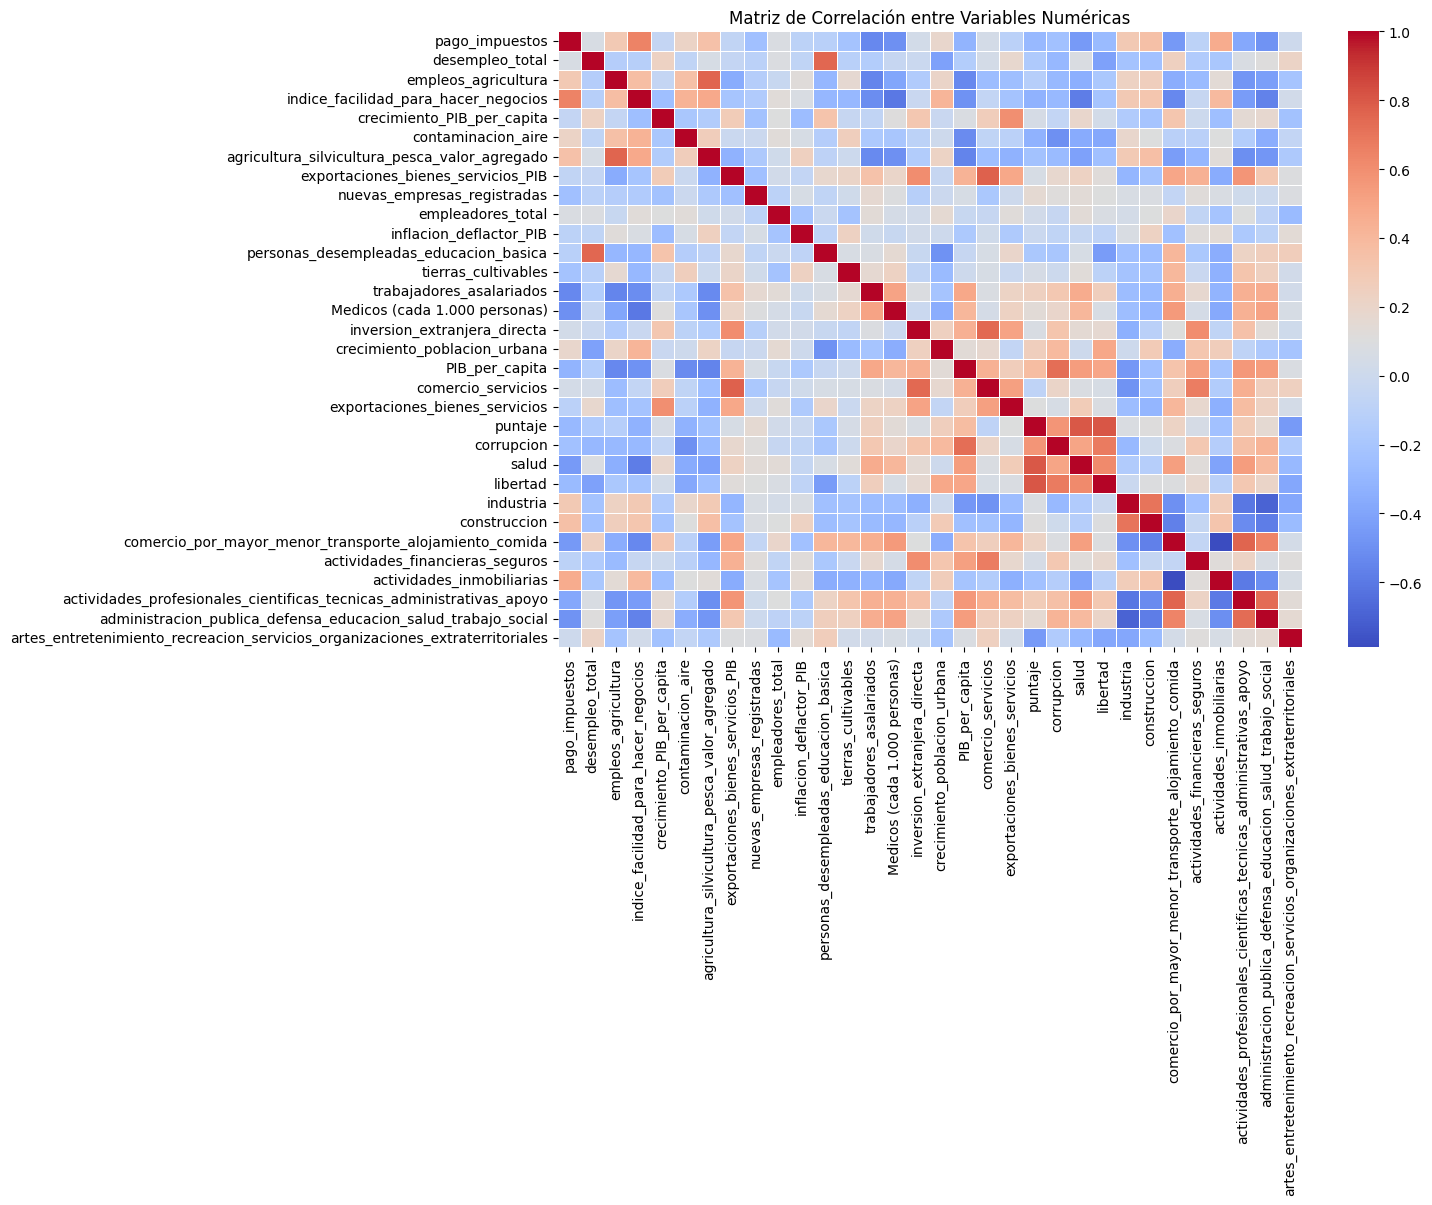


Asignación de Países a Clusters:
                   pais     continente  Cluster
0               Albania         Europe        0
27  Federación de Rusia         Europe        0
31            Guatemala  North America        0
32               Guyana  South America        0
33                Haití  North America        0
..                  ...            ...      ...
38               Italia         Europe        4
30               Grecia         Europe        4
18              Croacia         Europe        4
24               España         Europe        4
23            Eslovenia         Europe        4

[70 rows x 3 columns]


In [279]:
# 1. Cargar el dataset
file_path = "data_2/country_find_cleaned.csv"  
df = pd.read_csv(file_path)

# 2. Seleccionar solo las columnas numéricas para clustering
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

# 3. Normalizar los datos para evitar sesgo en las escalas de las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 4. Determinar el número óptimo de clusters usando el método del codo y el índice de silueta
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# 5. Graficar el método del codo y el índice de silueta en una sola figura
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

ax1.plot(k_range, wcss, 'bo-', label="WCSS (Codo)")
ax2.plot(k_range, silhouette_scores, 'ro-', label="Índice de Silueta")

ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('WCSS', color='blue')
ax2.set_ylabel('Índice de Silueta', color='red')
ax1.set_title('Método del Codo y Índice de Silueta en una sola gráfica')

ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.show()

# 6. Comparación del índice de silueta para diferentes valores de clusters (3, 4, 5 y 6)
cluster_options = [3, 4, 5, 6]
silhouette_results = {}

for k in cluster_options:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(df_scaled)
    silhouette_results[k] = silhouette_score(df_scaled, labels)

# Convertir los resultados en un DataFrame
silhouette_df = pd.DataFrame(list(silhouette_results.items()), columns=["Número de Clusters", "Índice de Silueta"])

# Agregar comentario sobre la mejor opción
silhouette_df["Comentario"] = silhouette_df["Índice de Silueta"].apply(
    lambda x: "Mejor opción" if x == max(silhouette_df["Índice de Silueta"]) else "Menor calidad")

# Mostrar la tabla con los resultados
print("\nComparación de Índice de Silueta para diferentes números de clusters:")
print(silhouette_df)

# 7. Aplicar K-Means con el número óptimo de clusters (5 según los análisis previos)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(df_scaled)

# 8. Calcular el índice de silueta para evaluar la calidad del clustering
silhouette_avg = silhouette_score(df_scaled, df["Cluster"])
print(f"\nÍndice de Silueta para K-Means con {optimal_k} clusters: {silhouette_avg}")

# 9. Reducir la dimensionalidad con PCA para visualizar los clusters
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Agregar los valores de PCA al dataframe
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

# 10. Graficar los clusters en un scatter plot con PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualización de Clusters usando PCA")
plt.legend(title="Cluster")
plt.show()

# 11. Calcular la importancia de cada variable en el modelo K-Means
feature_importance = np.abs(kmeans_final.cluster_centers_).mean(axis=0)
importance_df = pd.DataFrame({"Variable": numeric_columns, "Importancia": feature_importance})
importance_df = importance_df.sort_values(by="Importancia", ascending=False)

# 12. Graficar la importancia de las variables
plt.figure(figsize=(12, 6))
sns.barplot(y=importance_df["Variable"], x=importance_df["Importancia"], palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de cada Variable en el Modelo K-Means")
plt.show()

# 13. Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# 14. Mostrar los países con sus clusters asignados
df_countries_clusters = df[["pais", "continente", "Cluster"]].sort_values("Cluster")
print("\nAsignación de Países a Clusters:")
print(df_countries_clusters.head(70)) 

## Análisis de los Clusters

1.	Cluster 0:
- Alta facilidad para hacer negocios pero baja contaminación del aire.
- Baja agricultura y pesca en la economía.
- Alta inversión en salud y libertad.
- Industria y construcción moderadas.
2.	Cluster 1:
- Desempleo bajo y crecimiento del PIB moderado.
- Mayor proporción de empleadores y comercio minorista.
- Menos énfasis en actividades científicas y tecnológicas.
3.	Cluster 2:
- Alta contaminación del aire y desempleo alto.
- Menos innovación y empresas registradas.
- Menor inversión en salud y libertad.
4.	Cluster 3:
- PIB en crecimiento y menos contaminación.
- Moderada inversión en educación y salud.
- Menos énfasis en tecnología y servicios financieros.
5.	Cluster 4:
- Alto crecimiento del PIB y bajas exportaciones.
- Alto enfoque en actividades científicas y tecnológicas.
- Mayor participación en el sector financiero e inmobiliario.

In [280]:
# Guardar el modelo K-Means entrenado
model_filename = "data_2/kmeans_model_country.pkl"
joblib.dump(kmeans_final, model_filename)

# Guardar el escalador para futuras predicciones
scaler_filename = "data_2/scaler_country.pkl"
joblib.dump(scaler, scaler_filename)

# Guardar el DataFrame con los clusters asignados
output_filename = "data_2/country_clusters.csv"
df.to_csv(output_filename, index=False)

# Devolver los enlaces de los archivos guardados
model_filename, scaler_filename, output_filename

('data_2/kmeans_model_country.pkl',
 'data_2/scaler_country.pkl',
 'data_2/country_clusters.csv')

## Prueba

In [282]:
import joblib
import numpy as np
import pandas as pd

# Cargar el modelo K-Means y el escalador
model_filename = "data_2/kmeans_model_country.pkl"
scaler_filename = "data_2/scaler_country.pkl"
df_filename = "data_2/country_clusters.csv"

kmeans_model = joblib.load(model_filename)
scaler = joblib.load(scaler_filename)
df = pd.read_csv(df_filename)

# Obtener solo las columnas numéricas (excluir 'pais', 'continente' y otras categóricas)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Verificar el número de características esperadas por el escalador
num_features_expected = scaler.n_features_in_
num_features_actual = len(numeric_columns)

# Si hay una discrepancia, ajustamos el número de características
if num_features_actual > num_features_expected:
    numeric_columns = numeric_columns[:num_features_expected]  # Recortar si hay más
elif num_features_actual < num_features_expected:
    for i in range(num_features_expected - num_features_actual):
        column_name = f"extra_feature_{i}"
        df[column_name] = 0  # Agregar columnas extra para igualar

# Definir las preguntas y asignar valores numéricos a las respuestas
questions = [
    "¿Qué tan importante es la facilidad de hacer negocios en un país?",
    "¿Qué tanto valoras el crecimiento económico?",
    "¿Prefieres un país con baja contaminación del aire?",
    "¿Qué tan relevante es la inversión extranjera para ti?",
    "¿Cuánto valoras el acceso a servicios de salud?",
    "¿Qué nivel de libertad personal buscas?",
    "¿Te interesa un país con una economía fuerte en tecnología?",
    "¿Qué importancia le das a la estabilidad del costo de vida?",
    "¿Qué tanto te afecta la percepción de corrupción en un país?",
    "¿Buscas oportunidades laborales en el sector financiero?",
    "¿Eres ingeniero de software y buscas un país tecnológico?",
    "¿Trabajas en salud y buscas un país con buenas oportunidades?",
    "¿Eres artista y buscas un país con apoyo a la cultura?",
    "¿Prefieres países con alto crecimiento urbano?",
    "¿Buscas oportunidades en la industria manufacturera?",
    "¿Te interesa un país con altos salarios promedio?",
    "¿Prefieres países con estabilidad política alta?",
    "¿Buscas un país con muchas oportunidades para emprendedores?",
    "¿Te interesa un país con fuerte presencia en inteligencia artificial?",
    "¿Prefieres un país con gran inversión en educación superior?"
]

response_mapping = {
    "Muy importante": 3,
    "Importante": 2,
    "Poco importante": 1,
    "Nada importante": 0
}

# Función para recomendar países con base en respuestas del usuario
def recomendar_paises(respuestas_usuario):
    """
    Toma una lista de respuestas del usuario y recomienda los 5 mejores países del cluster correspondiente.
    """
    if len(respuestas_usuario) != len(questions):
        raise ValueError(f"Se esperaban {len(questions)} respuestas, pero se recibieron {len(respuestas_usuario)}.")

    # Convertir respuestas en valores numéricos
    respuestas_numericas = [response_mapping[resp] for resp in respuestas_usuario]

    # Ajustar la cantidad de características
    respuestas_completas = np.zeros(num_features_expected)  # Inicializar con ceros
    respuestas_completas[:len(respuestas_numericas)] = respuestas_numericas  # Asignar respuestas

    # Normalizar con el escalador original
    respuestas_scaled = scaler.transform([respuestas_completas])

    # Predecir el cluster del usuario
    cluster_predicho = kmeans_model.predict(respuestas_scaled)[0]

    # Filtrar los países que pertenecen a este cluster
    paises_cluster = df[df["Cluster"] == cluster_predicho].copy()

    # Calcular la distancia al centroide usando solo las columnas numéricas corregidas
    centroide = kmeans_model.cluster_centers_[cluster_predicho]
    paises_cluster["Distancia"] = np.linalg.norm(paises_cluster[numeric_columns] - centroide, axis=1)

    # Seleccionar los 5 países más cercanos al centroide
    paises_recomendados = paises_cluster.sort_values("Distancia").head(5)[["pais", "continente"]]

    return paises_recomendados

# Ejemplo de uso (Simulando respuestas del usuario)
respuestas_ejemplo = [
    "Muy importante", "Importante", "Poco importante", "Nada importante",
    "Muy importante", "Importante", "Poco importante", "Nada importante",
    "Muy importante", "Importante", "Poco importante", "Nada importante",
    "Muy importante", "Importante", "Poco importante", "Nada importante",
    "Muy importante", "Importante", "Poco importante", "Nada importante"
]

# Obtener recomendaciones
paises_sugeridos = recomendar_paises(respuestas_ejemplo)

# Mostrar los resultados
print("\nPaíses recomendados según las respuestas del usuario:")
print(paises_sugeridos)


Países recomendados según las respuestas del usuario:
        pais continente
12  Bulgaria     Europe
41   Letonia     Europe
18   Croacia     Europe
54   Polonia     Europe
42  Lituania     Europe


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Prueba 2

In [285]:
# Nueva simulación con diferentes respuestas del usuario
nuevas_respuestas = [
    "Nada importante", "Poco importante", "Muy importante", "Importante",
    "Nada importante", "Muy importante", "Importante", "Poco importante",
    "Muy importante", "Nada importante", "Poco importante", "Importante",
    "Muy importante", "Muy importante", "Nada importante", "Poco importante",
    "Importante", "Muy importante", "Poco importante", "Nada importante"
]

# Obtener nuevas recomendaciones
nuevos_paises_sugeridos = recomendar_paises(nuevas_respuestas)

# Mostrar los nuevos resultados
print("\nNuevos países recomendados según las respuestas del usuario:")
print(nuevos_paises_sugeridos)


Nuevos países recomendados según las respuestas del usuario:
           pais     continente
51     Paraguay  South America
22  El Salvador  North America
16     Colombia  South America
53         Perú  South America
17   Costa Rica  North America


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
